# Comparing sorting algorithms: Insertion-sort and Merge-sort

## Introduction
Sorting algorithms are algorithms that put elements of a list in a certain order. The most common order is numerical order, but it is possible to sort by any arbitrary order defined by the user. The performance of a sorting algorithm is measured by the number of comparisons and swaps it makes. In general, the fewer comparisons and swaps, the better the performance of the algorithm. In this notebook, we will compare the performance of two sorting algorithms: Insertion-sort and Merge-sort.
We will use the Python programming language to implement the algorithms and the Jupyter notebook to run the experiments and visualize the results.

## Insertion-sort
Insertion-sort is a simple sorting algorithm that builds the final sorted list one item at a time. In particular, it takes an element from the list and inserts it into its correct position in the sorted list. The algorithm works as follows:
- Start from the second element of the list and compare it with the first element. If the second element is smaller than the first element, swap them.
- Move to the third element and compare it with the second element. If the third element is smaller than the second element, swap them. Then, compare the third element with the first element. If the third element is smaller than the first element, swap them.
- Continue this process until the list is sorted.

Insertion-sort has a time complexity of O(n^2) in the worst case, where n is the number of elements in the list; this is because the algorithm compares each element with all the elements before it in the worst case. In the best case, the time complexity is O(n), where the list is already sorted, and the algorithm only needs to make n-1 comparisons.
The space complexity of Insertion-sort is O(1) because it doesn't need any extra space to sort the list.

Here's the Python implementation of Insertion-sort:


In [169]:
def insertion_sort(array):
    for i in range(1, len(array)): # Start from the second element
        key = array[i] # Take the current element
        j = i - 1 # Start comparing with the previous element
        while j >= 0 and key < array[j]: # Compare with all previous elements
            array[j + 1] = array[j] # Move the greater element one step forward
            j -= 1 # Move to the next element
        array[j + 1] = key # Insert the current element in its correct position

In [170]:
# example
A = [12, 11, 13, 5, 6]
insertion_sort(A)
print("Sorted array is:", A)

Sorted array is: [5, 6, 11, 12, 13]


## Merge-sort
Merge-sort is a sorting algorithm that follows the divide-and-conquer paradigm. It works as follows:

- **Divide**: Divide the list into two sublists of equal size.
- **Conquer**: Sort the two sublists recursively using Merge-sort.
- **Merge**: Merge the two sorted sublists into a single sorted list. 

Basically, Merge-sort divides the list into smaller sublists until each sublist has only one element. Then, it merges the sublists in a way that the final list is sorted.

Regarding the time complexity, it's to be noted that at every recursion level, the algorithm performs O(n) operations, where n is the number of elements in the list. The number of recursion levels is O(log n), as the list is divided into two halves at each level. Therefore, the overall time complexity of Merge-sort is O(n log n) in the worst case (and, in fact, in any case). The space complexity of Merge-sort is O(n) because it needs extra space to store the sublists during the merge step. 
The space complexity of Merge-sort is O(n) because it needs extra space to store the sublists during the merge step.

Here's the Python implementation of Merge-sort:



In [171]:
def merge_sort(array, p, r):
    if p < r:
        q = (p + r) // 2 # Find the middle element
        merge_sort(array, p, q) # Sort the first half
        merge_sort(array, q + 1, r) # Sort the second half
        merge(array, p, q, r) # Merge the two halves

def merge(array, p, q, r):
    n1 = q - p + 1 # Length of the first half
    n2 = r - q # Length of the second half
    L = [0] * (n1 + 1) # Create a temporary array for the first half
    R = [0] * (n2 + 1) # Create a temporary array for the second half
    for i in range(n1):
        L[i] = array[p + i] # Copy the first half
    for j in range(n2):
        R[j] = array[q + j + 1] # Copy the second half
    L[n1] = float('inf') # Add a sentinel value
    R[n2] = float('inf') # Add a sentinel value
    i = 0
    j = 0
    for k in range(p, r + 1):
        if L[i] <= R[j]: # Compare the first elements of the two halves
            array[k] = L[i] # Copy the smaller element
            i += 1
        else:
            array[k] = R[j] # Copy the smaller element
            j += 1
        

In [172]:
# example
A = [12, 11, 13, 5, 6, 7, 22, 1, 3, 18, 5, 9, 2]
merge_sort(A, 0, len(A) - 1)
print("Sorted array is:", A)

Sorted array is: [1, 2, 3, 5, 5, 6, 7, 9, 11, 12, 13, 18, 22]


## Test Description
In order to compare the performance of Insertion-sort and Merge-sort, we will run experiments on lists of different sizes and measure the time taken by each algorithm to sort the list. We will use the time module in Python to measure the time taken by each algorithm, and we will use the matplotlib library to visualize the results. 

The following function will be used to generate lists of different types:

In [173]:
import random

def generate_list(list_type, n):
    if list_type == 'random':
        return random.sample(range(n), n)
    elif list_type == 'sorted':
        return [i for i in range(n)]
    elif list_type == 'reversed':
        return [i for i in range(n, 0, -1)]
    elif list_type == 'nearly sorted':
        lst = [i for i in range(n)]
        if n > 2:
            for _ in range(n // 20 if n > 39 else 1): # once every 20 elements if n > 39, otherwise once
                i, j = random.sample(range(n), 2) # pick two random indices
                lst[i], lst[j] = lst[j], lst[i] # and swap the elements at the two indices
        return lst

# example
print("random list: ", generate_list('random', 10))
print("sorted list: ", generate_list('sorted', 10))
print("reversed list: ", generate_list('reversed', 10))
print("nearly sorted list: ", generate_list('nearly sorted', 20))


random list:  [7, 1, 5, 0, 9, 8, 6, 3, 2, 4]
sorted list:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
reversed list:  [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
nearly sorted list:  [0, 1, 2, 3, 4, 5, 6, 7, 9, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


Whereas the following function will be used to test the performance of Insertion-sort and Merge-sort:

In [174]:
import matplotlib.pyplot as plt
import time

def compare_sorting_algorithms(list_type, n):
    ins_y = []
    mer_y = []
    for i in range(1, n + 1):
        lst = generate_list(list_type, i)
        start_time = time.time()
        insertion_sort(lst.copy())
        end_time = time.time()
        z = ins_y[-1] if ins_y else 0
        ins_y.append((end_time - start_time) / i + z)
        start_time = time.time()
        merge_sort(lst.copy(), 0, len(lst) - 1)
        end_time = time.time()
        z = mer_y[-1] if mer_y else 0
        mer_y.append((end_time - start_time) / i + z)
    plt.plot(range(1, n + 1), ins_y, label='Insertion-sort')
    plt.plot(range(1, n + 1), mer_y, label='Merge-sort')
    plt.xlabel('List size')
    plt.ylabel('Time (s)')
    plt.title('Insertion-sort vs Merge-sort on ' + list_type + ' lists')
    plt.legend()
    plt.show()

In particular, the function above takes two arguments: the type of the list to generate and the maximum size of the list. It generates lists of different sizes up to the maximum size and measures the time taken by Insertion-sort and Merge-sort to sort each list. The formula used to calculate the time is the following: $y_n = \frac{t_n}{n} + y_{n-1}$, where $y_n$ is the average time taken to sort a list of size n, $t_n$ is the time taken to sort a list of size n (calculated with the **time** module), and $y_{n-1}$ is the average time taken to sort a list of size n-1. This formula is used to smooth out the noise in the measurements and make the trends more visible.

We can now run our tests on lists of different sizes and types. In particular, we will test the algorithms on random lists, sorted lists, reversed lists, and nearly sorted lists of sizes up to 250, 500, 1000 and 2000 elements.

### 250 elements

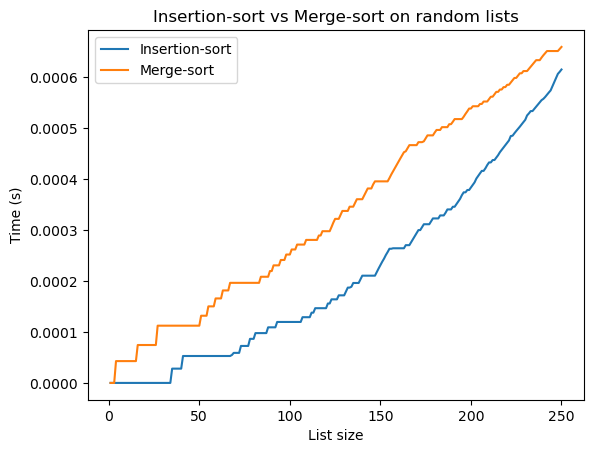

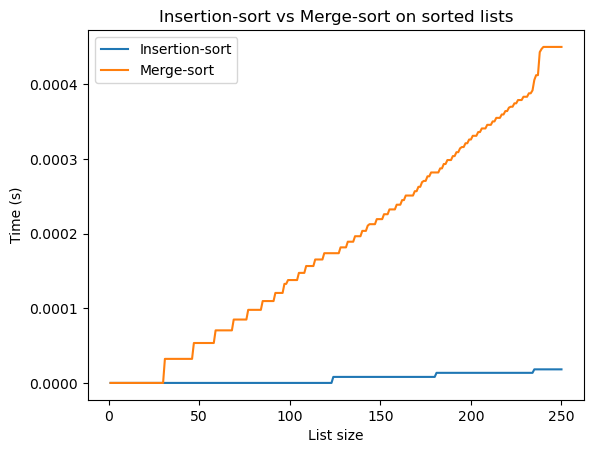

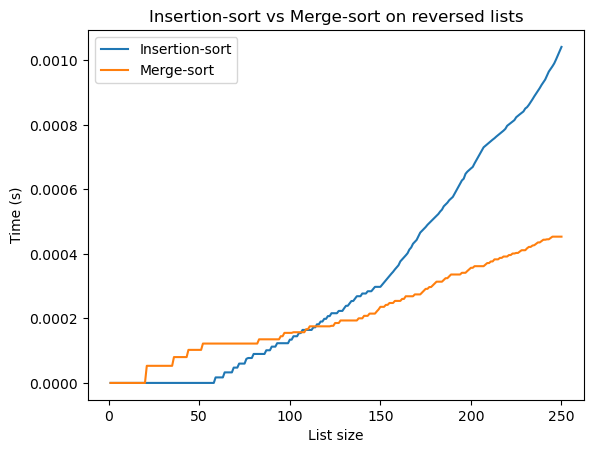

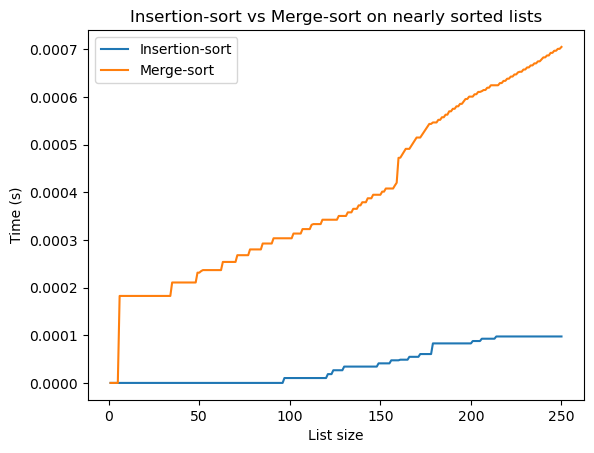

In [175]:
compare_sorting_algorithms('random', 250)
compare_sorting_algorithms('sorted', 250)
compare_sorting_algorithms('reversed', 250)
compare_sorting_algorithms('nearly sorted', 250)

### 500 elements

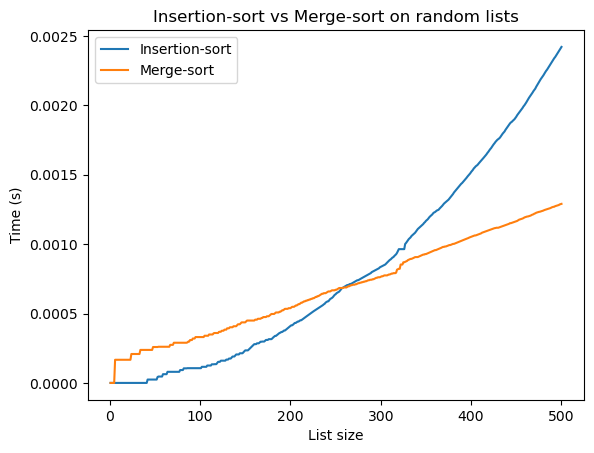

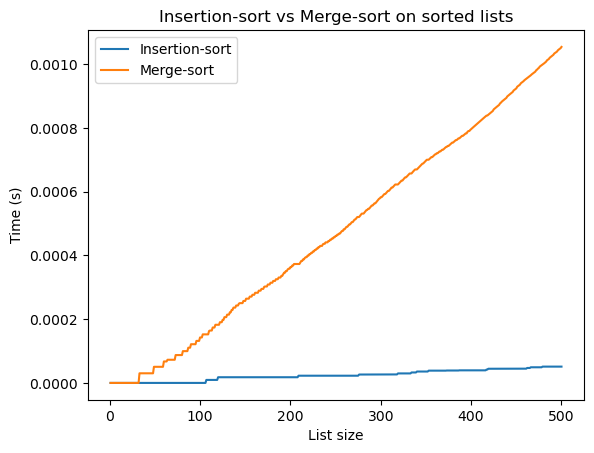

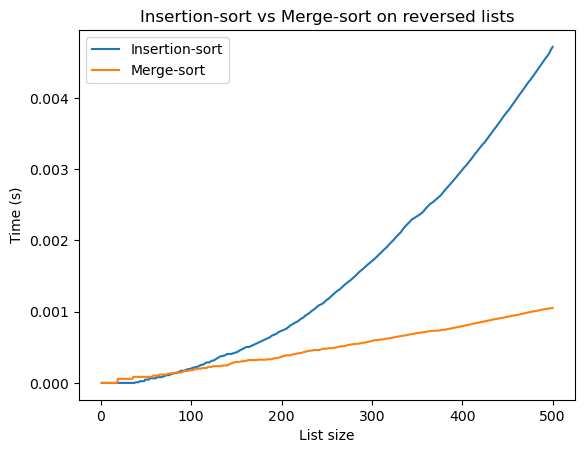

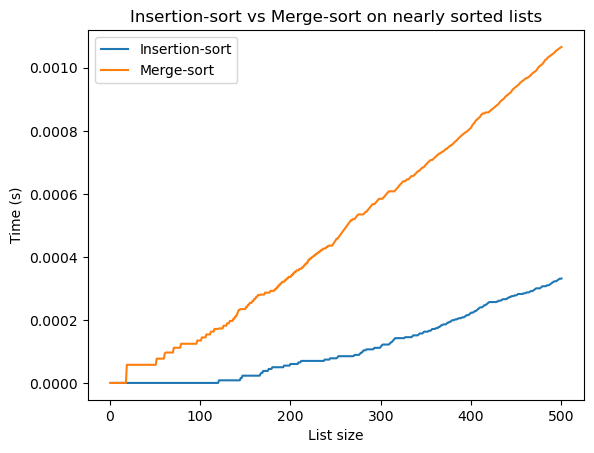

In [176]:
compare_sorting_algorithms('random', 500)
compare_sorting_algorithms('sorted', 500)
compare_sorting_algorithms('reversed', 500)
compare_sorting_algorithms('nearly sorted', 500)

### 1000 elements

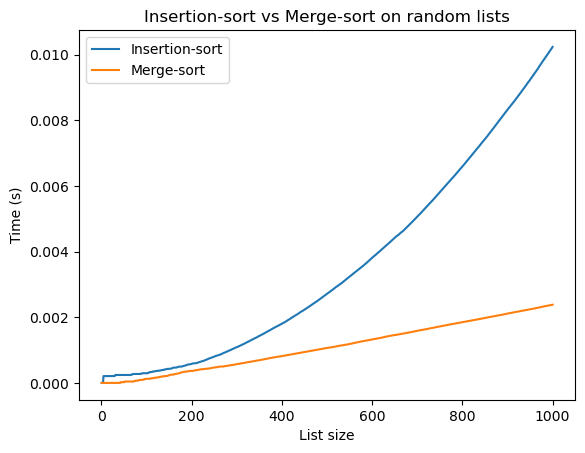

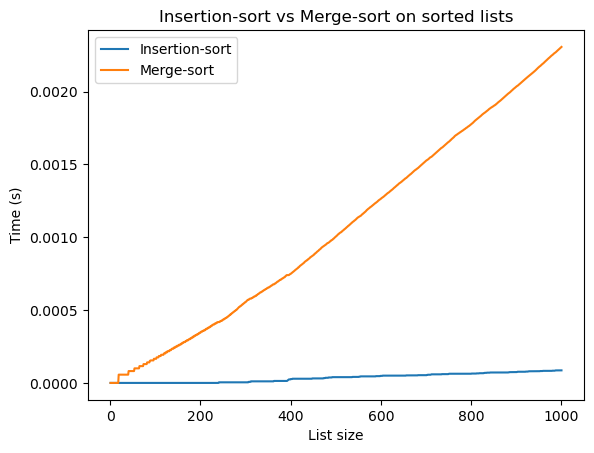

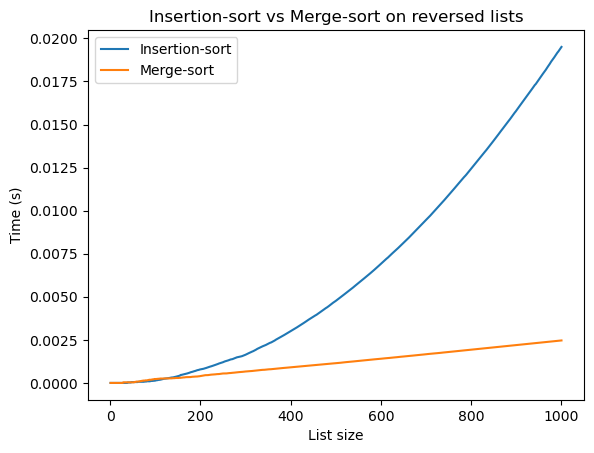

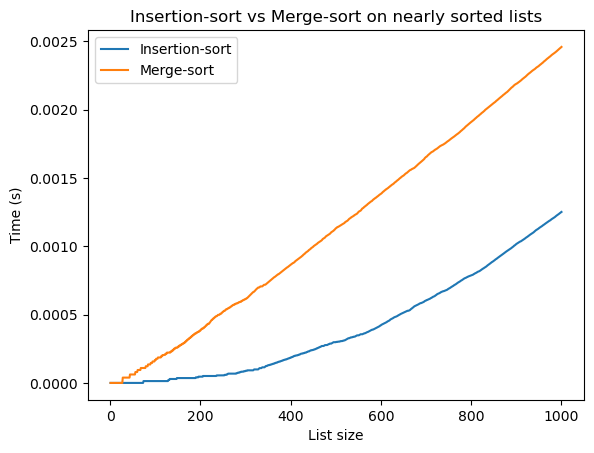

In [177]:
compare_sorting_algorithms('random', 1000)
compare_sorting_algorithms('sorted', 1000)
compare_sorting_algorithms('reversed', 1000)
compare_sorting_algorithms('nearly sorted', 1000)

## 2000 elements

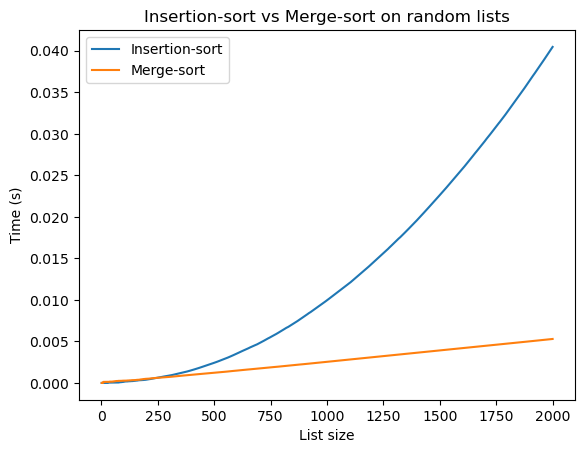

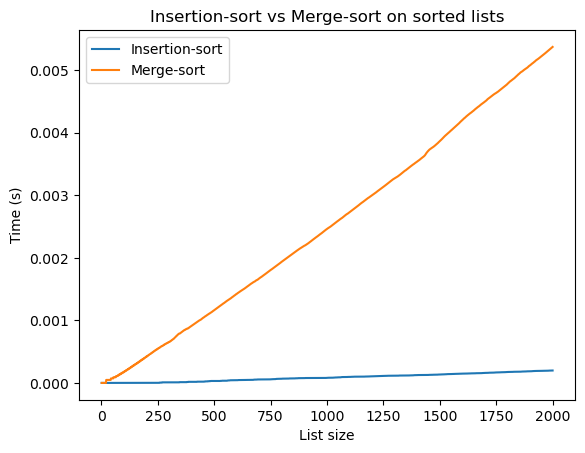

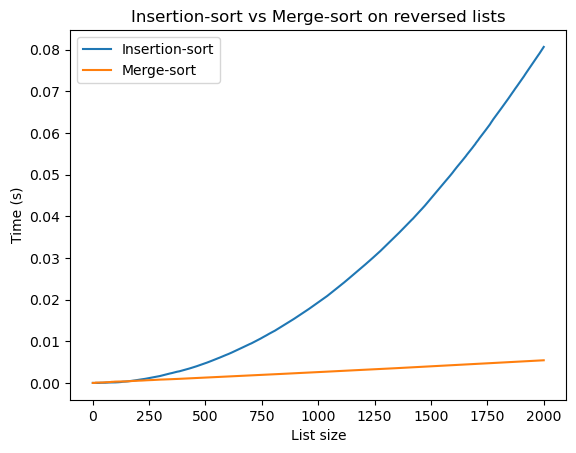

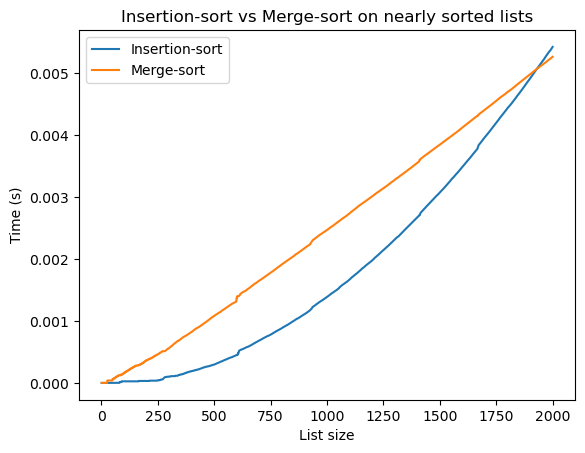

In [178]:
compare_sorting_algorithms('random', 2000)
compare_sorting_algorithms('sorted', 2000)  
compare_sorting_algorithms('reversed', 2000)
compare_sorting_algorithms('nearly sorted', 2000)

## Conclusion
The experiments conducted show some interesting but expected results. If we consider random lists, which are the most common in practice, we can see that insertion-sort is slightly faster with smaller inputs (up to 250 elements), but merge-sort is asymptotically faster with larger inputs; This is because insertion-sort has a time complexity of O(n^2), while merge-sort has a time complexity of O(n log n). Regarding reversed lists, we clearly see that merge-sort is more efficient with all input sizes, because it is not affected by the initial order of the list whereas reversed lists represent the worst scenario for insertion-sort, because each element needs to be pushed back to the start of the list. In the case sorted lists, insertion-sort is always faster than merge-sort, because it basically only needs to iterate through the list once, without making any swaps. Finally, nearly sorted lists show that insertion-sort is in general faster than merge-sort, but it also depends on **how nearly** the list is sorted. In general, the more nearly sorted the list is, the faster insertion-sort will be compared to merge-sort.
In conclusion, merge-sort proves to be a more efficient sorting algorithm than insertion-sort, especially with larger input sizes. However, insertion-sort can be faster than merge-sort in some specific cases, such as when the list is already sorted or nearly sorted, or when the input is very small.